# **Regression**

**Simple Linear Regression**

Skewness of height:  0.05971615080592437
Kurtosis of height:  -1.023667931046893
Skewness of weight:  0.741939392273259
Kurtosis of weight:  -0.6435799757709688
Spearman Correlation:  SignificanceResult(statistic=np.float64(0.8807334819872751), pvalue=np.float64(1.3720954980234503e-10))
Pearson Correlation:  PearsonRResult(statistic=np.float64(0.8840621762113798), pvalue=np.float64(9.430280531390732e-11))


/tmp/ipython-input-9853097.py:24: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  print("Spearman Correlation: ", stats.stats.spearmanr(height, weight))
/tmp/ipython-input-9853097.py:25: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  print("Pearson Correlation: ", stats.stats.pearsonr(height, weight))


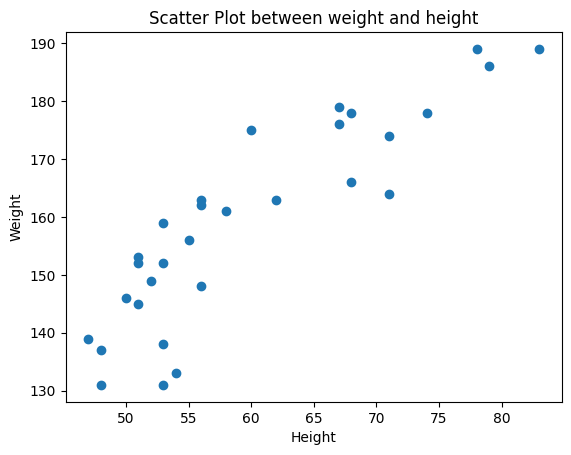

Adjusted R squared for linear regression model:  0.781565931407601
Coefficient of independent variables:  [[0.51963521]]
Intercept in model:  [-22.88997345]
Predicted weight for 172 cm:  [66.487282]
Predicted weight for 180 cm:  [70.64436365]
Predicted weight for 176 cm:  [68.56582282]


In [ ]:
#Program to show usage of simple linear regression.
#Importing necessary libraries.
from sklearn import linear_model
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

#List of 30 elements depicting independent variable (height).
height = [145, 163, 152, 137, 175, 131, 164, 148, 186, 178, 156, 179, 163, 152, 131, 138, 166, 189, 133, 178,
          161, 149, 189, 176, 159, 162, 174, 146, 139, 153]

#List of 30 elements depicting dependent variable (weight).
weight = [51, 56, 53, 48, 60, 53, 71, 56, 79, 68, 55, 67, 62, 51, 48, 53, 68, 83, 54, 74, 58, 52, 78,
          67, 53, 56, 71, 50, 47, 51]

#Assumption 01: Determining normality of data
print("Skewness of height: ", stats.skew(height))
print("Kurtosis of height: ", stats.kurtosis(height))
print("Skewness of weight: ", stats.skew(weight))
print("Kurtosis of weight: ", stats.kurtosis(weight))

#Assumption 02: Correlation between depent, independent variables
#Null Hypothesis: There is no significant correlation between weight and height.
print("Spearman Correlation: ", stats.stats.spearmanr(height, weight))
print("Pearson Correlation: ", stats.stats.pearsonr(height, weight))

#Creating a scatter plot between weight and height.
plt.scatter(weight, height)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Scatter Plot between weight and height")
plt.show()

#Converting list into data frame.
heightdf = pd.DataFrame(height)
weightdf = pd.DataFrame(weight)

#Creating a linear regression model.
model = linear_model.LinearRegression()

#Fitting the model using fit() function.
model.fit(heightdf, weightdf)
print("Adjusted R squared for linear regression model: ", model.score(heightdf, weightdf))

#Equation coefficient and intercept.
print("Coefficient of independent variables: ", model.coef_)
print("Intercept in model: ", model.intercept_)

#Creating a new data frame of independent variable (height).
testheight = pd.DataFrame([172, 180, 176])

#Predicting the values of weight dependiong on height.
print("Predicted weight for 172 cm: ", model.predict(testheight)[0])
print("Predicted weight for 180 cm: ", model.predict(testheight)[1])
print("Predicted weight for 176 cm: ", model.predict(testheight)[2])

**Multiple Linear Regression**

In [ ]:
#Program to develop a regression model on an existing dataset.
#Importing different libraries.
import pandas
import numpy
from math import sqrt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Loading California Housing dataset from the sklearn.datasets.
housing = fetch_california_housing()

#Displaying the structure of dataset.
print("Keys of housing dataset:{}".format(housing.keys()))
print("Description of housing dataset:{}".format(housing['DESCR']))
print("Feature Names:{}".format(housing['feature_names']))
print("Type of housing data:{}".format(type(housing['data'])))
print("Shape of housing data:{}".format(housing['data']))
print("Dimensions of data variables:{}".format(housing['data'].shape))
print("Type of target:{}".format(type(housing['target'])))
print("Shape of target:{}".format(housing['target'].shape))

#Creating a dataframe of Housing dataset.
housingdfg = pandas.DataFrame(housing.data)
housingdfg.columns = housing.feature_names
housingdfg['MEDV'] = housing.target
print(housingdfg.head())

#Generating the same dataset using seed() function.
numpy.random.seed(2000)

#Creating the training and test dataset.
training, test = train_test_split(housingdfg, test_size=0.3)
x_trg = training.drop('MEDV', axis=1)
y_trg = training['MEDV']
x_test = test.drop('MEDV', axis=1)
y_test = test['MEDV']
print(training.shape)
print(test.shape)

#Creating a linear regression model.
model1 = linear_model.LinearRegression()

#Train the model using the training sets.
model1.fit(x_trg, y_trg)

#Determining accuracy of the training set.
print("Accuracy of training dataset is: ", model1.score(x_trg, y_trg))

#Displaying equation coefficient and intercept.
print('Value of Coefficients is: \n', model1.coef_)
print('Value of Intercept is: ', model1.intercept_)

#Predict the output from test set.
predicted = model1.predict(x_test)

#Determining root mean squared error.
rmselm = sqrt(mean_squared_error(y_test, predicted))
print("The value of RMSE error is: ", rmselm)

Keys of housing dataset:dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
Description of housing dataset:.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California distri

In [ ]:
# Program to develop a regression model on an existing dataset.

# Import necessary libraries
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load California Housing dataset
housing = fetch_california_housing()

# Display dataset info
print("Keys of housing dataset:", housing.keys())
print("\nDescription of dataset:\n", housing['DESCR'][:500], "...")  # Truncated for brevity
print("\nFeature Names:", housing['feature_names'])
print("Type of housing data:", type(housing['data']))
print("Shape of housing data:", housing['data'].shape)
print("Type of target:", type(housing['target']))
print("Shape of target:", housing['target'].shape)

# Create DataFrame from the dataset
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['MedHouseVal'] = housing.target
print("\nFirst five rows of the dataframe:")
print(housing_df.head())

# Set random seed for reproducibility
np.random.seed(2000)

# Split dataset into training and testing sets (70% train, 30% test)
train_df, test_df = train_test_split(housing_df, test_size=0.3)
X_train = train_df.drop('MedHouseVal', axis=1)
y_train = train_df['MedHouseVal']
X_test = test_df.drop('MedHouseVal', axis=1)
y_test = test_df['MedHouseVal']

print(f"\nTraining set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model performance on training set
train_score = model.score(X_train, y_train)
print(f"\nTraining set R^2 score: {train_score:.4f}")

# Display model coefficients and intercept
print("\nModel coefficients:")
for feature, coef in zip(housing.feature_names, model.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"Model intercept: {model.intercept_:.4f}")

# Predict house values on the test set
y_pred = model.predict(X_test)

# Calculate and display Root Mean Squared Error (RMSE) on test set
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"\nRoot Mean Squared Error (RMSE) on test set: {rmse:.4f}")


Keys of housing dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Description of dataset:
 .. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group popu ...

Feature Names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Type of housing data: <class 'numpy.ndarray'>
Shape of housing data: (20640, 8)
Type of target: <class 'numpy.ndarray'>
Shape of target: (20640,)

First five rows of the dataframe:
   MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  MedHouseVa

**Quick way to check intercept with standardized data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

print("Intercept with scaled features:", model_scaled.intercept_)


Intercept with scaled features: 2.0759365891472807


When you scale your features (mean 0, std 1), the intercept becomes roughly the average target value (median house value in this case), which is why it’s positive and easier to interpret.

This means model with scaled features predicts the average house value when all scaled features are zero (i.e., at their means).

**Pipeline:**

**Scales features with StandardScaler**

**Fits a linear regression model**

**Makes predictions**

**Visualizes predicted vs actual values and residuals**

RMSE on test data: 0.7169


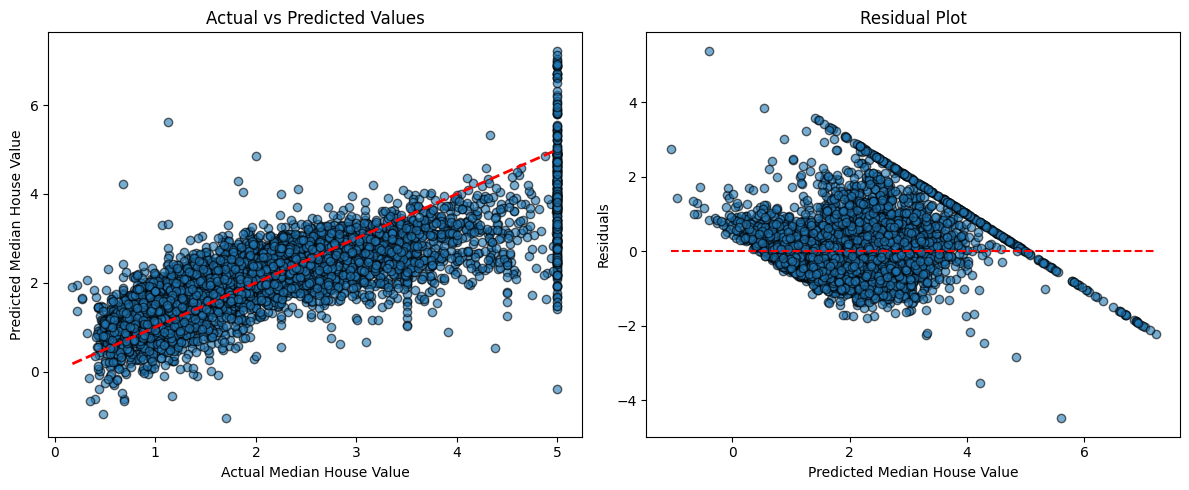

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2000)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on test data: {rmse:.4f}")

# Plot Predicted vs Actual
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Values')

# Plot residuals
residuals = y_test - y_pred

plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='k')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted Median House Value')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()


**Program to develop model after data exploration and processing**

Dimension of Housing California Dataset: (20640, 8)
Dimension of Target Dataset: (20640,)
The name of the columns are:
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
   MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  MedHouseVal
0  8.3252      41.0  6.984127  ...     37.88    -122.23        4.526
1  8.3014      21.0  6.238137  ...     37.86    -122.22        3.585
2  7.2574      52.0  8.288136  ...     37.85    -122.24        3.521
3  5.6431      52.0  5.817352  ...     37.85    -122.25        3.413
4  3.8462      52.0  6.281853  ...     37.85    -122.25        3.422

[5 rows x 9 columns]
Details of 'MedInc':
 count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64
Value counts for 'HouseAge':
 HouseAge
1.0        4
2.0       58
3.0       62
4.0      191
5.0      244
6.0      160
7

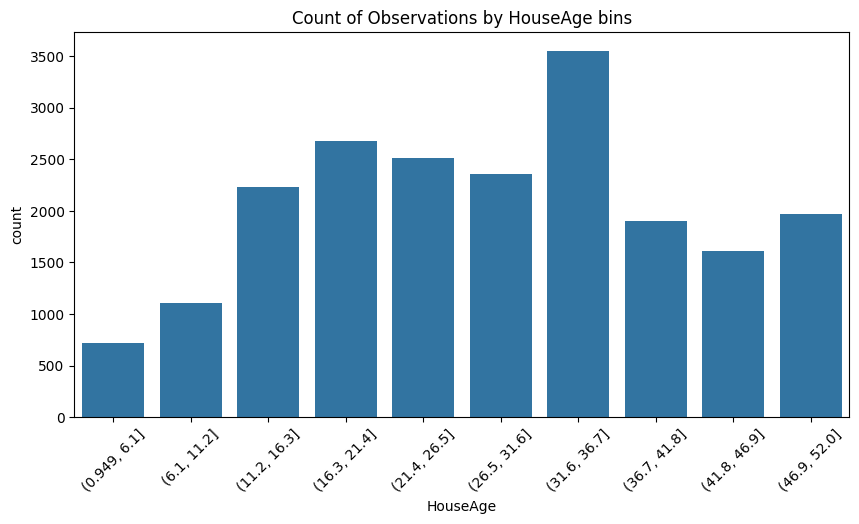

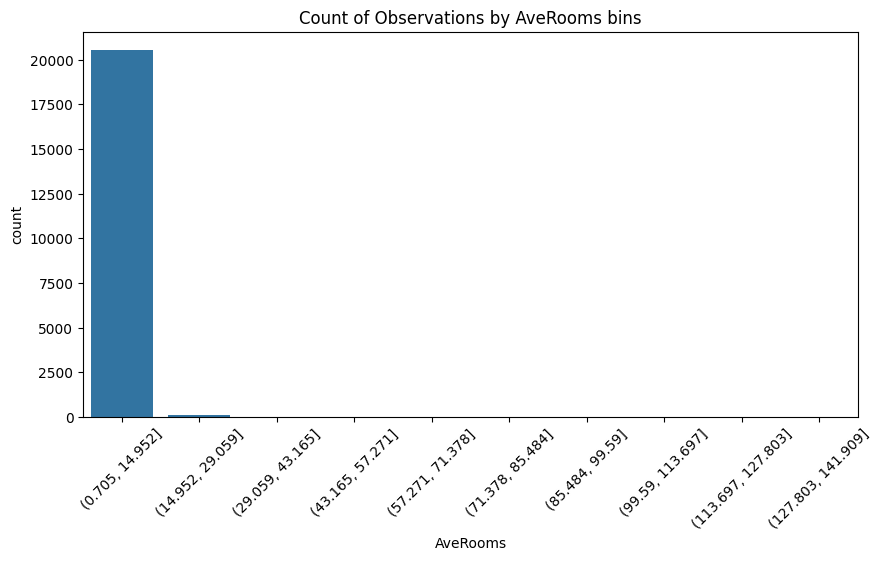

-----------------------BOX PLOT--------------------


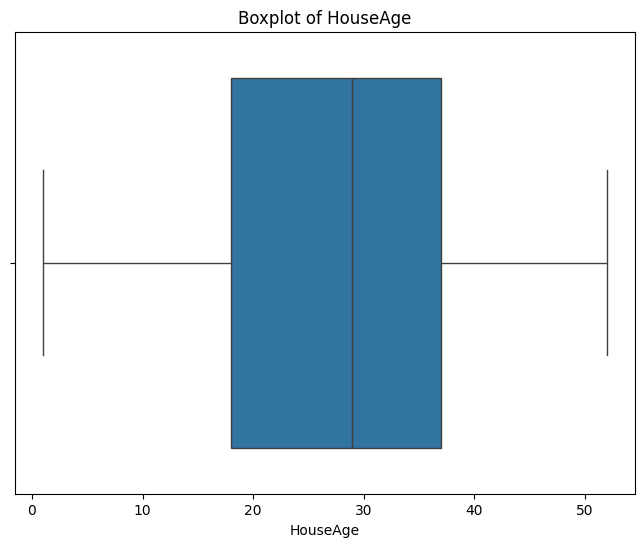

-----------------------DISTRIBUTION PLOTS---------------------


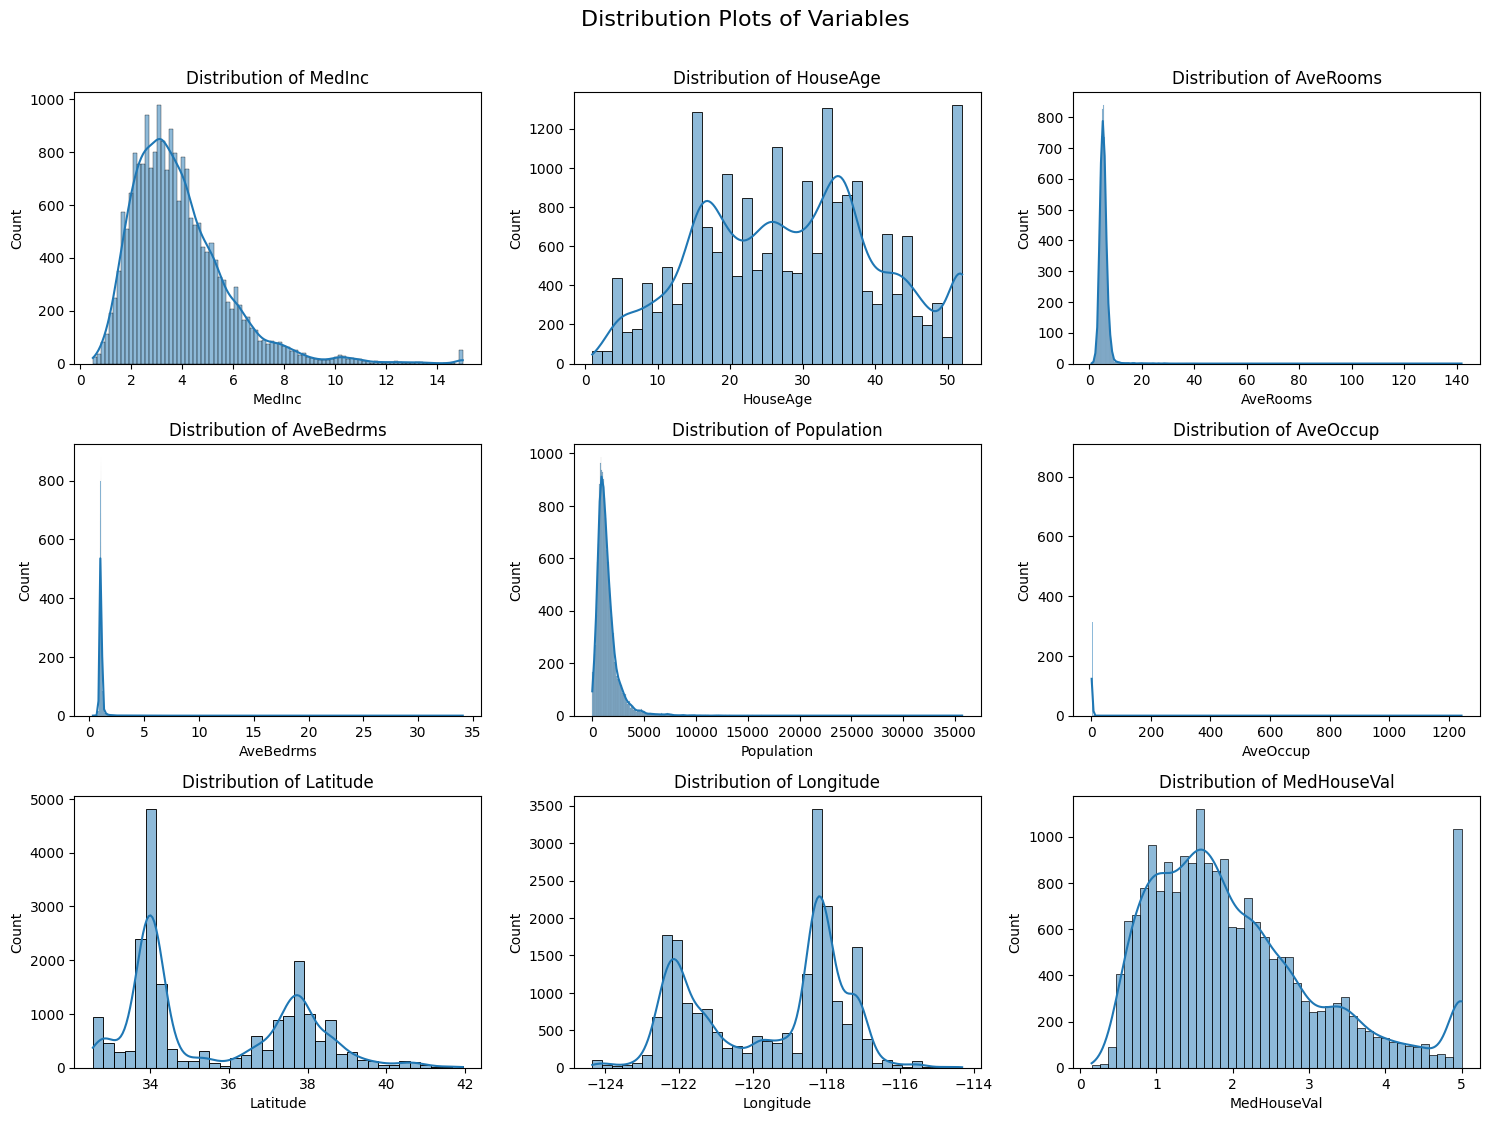

------------------------------HEATMAP--------------------------------------


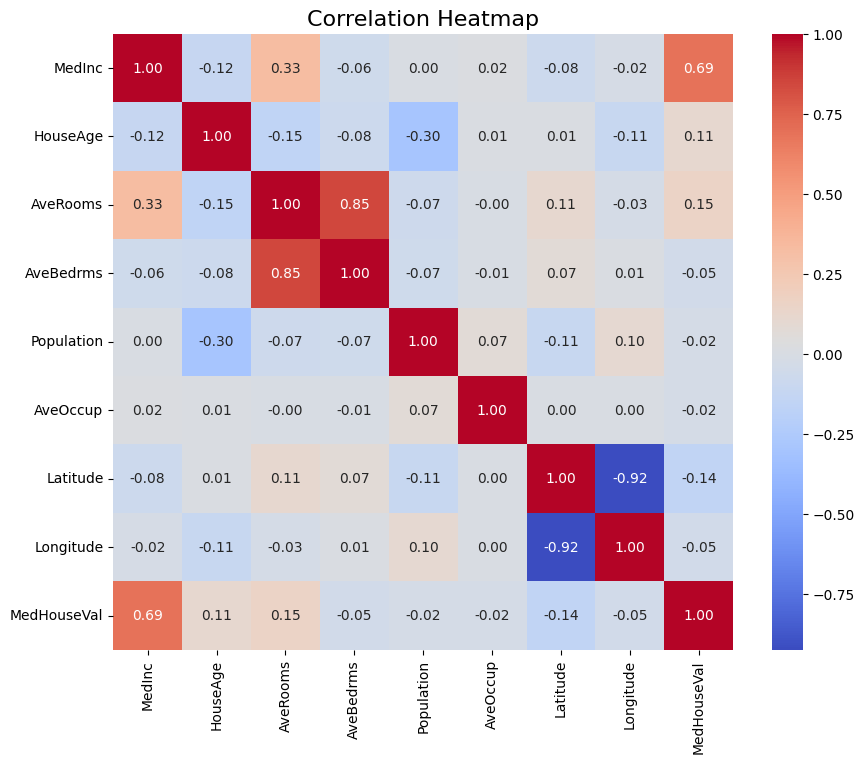

------------------------------SCATTER PLOT------------------------------------


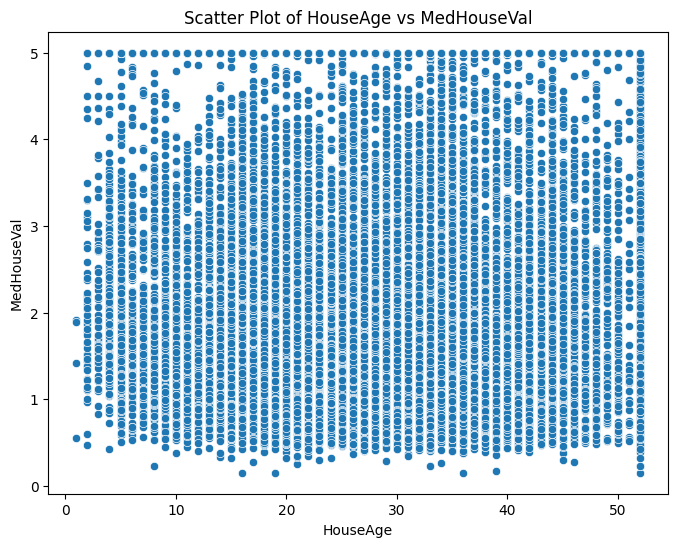

------------------------------PAIR PLOT--------------------------------


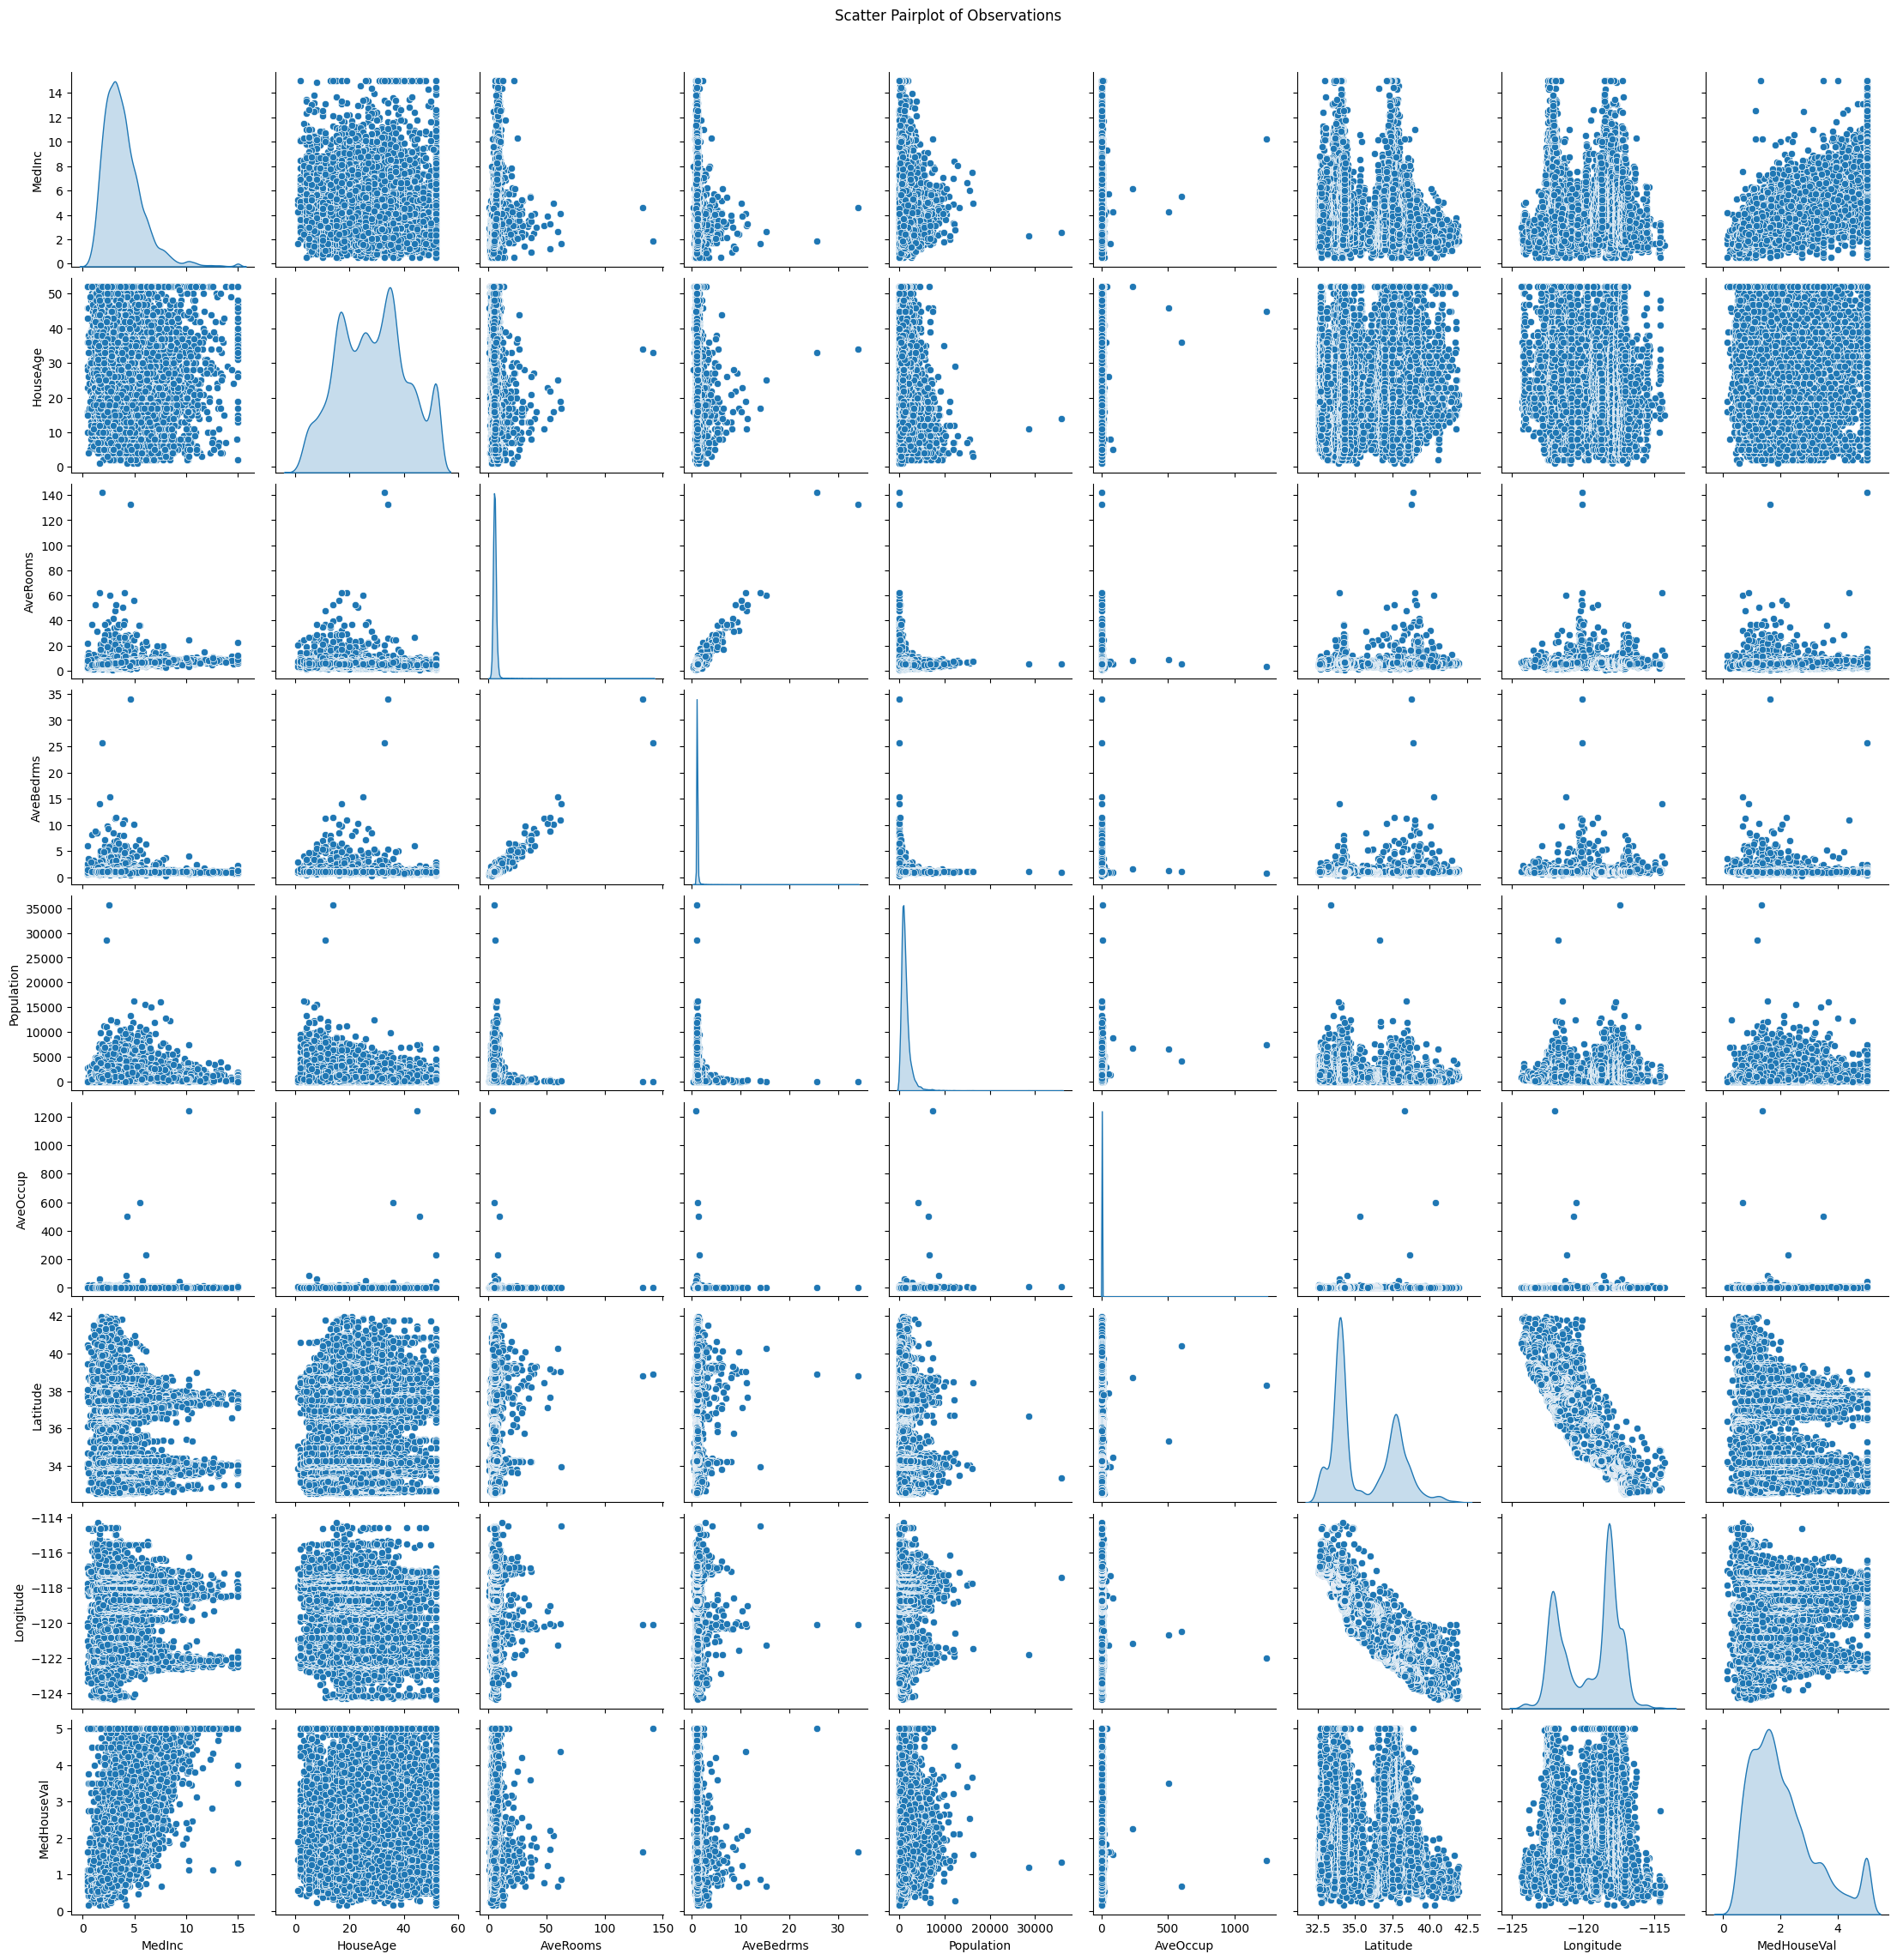

------------------------------REGRESSION PAIR PLOT--------------------------------


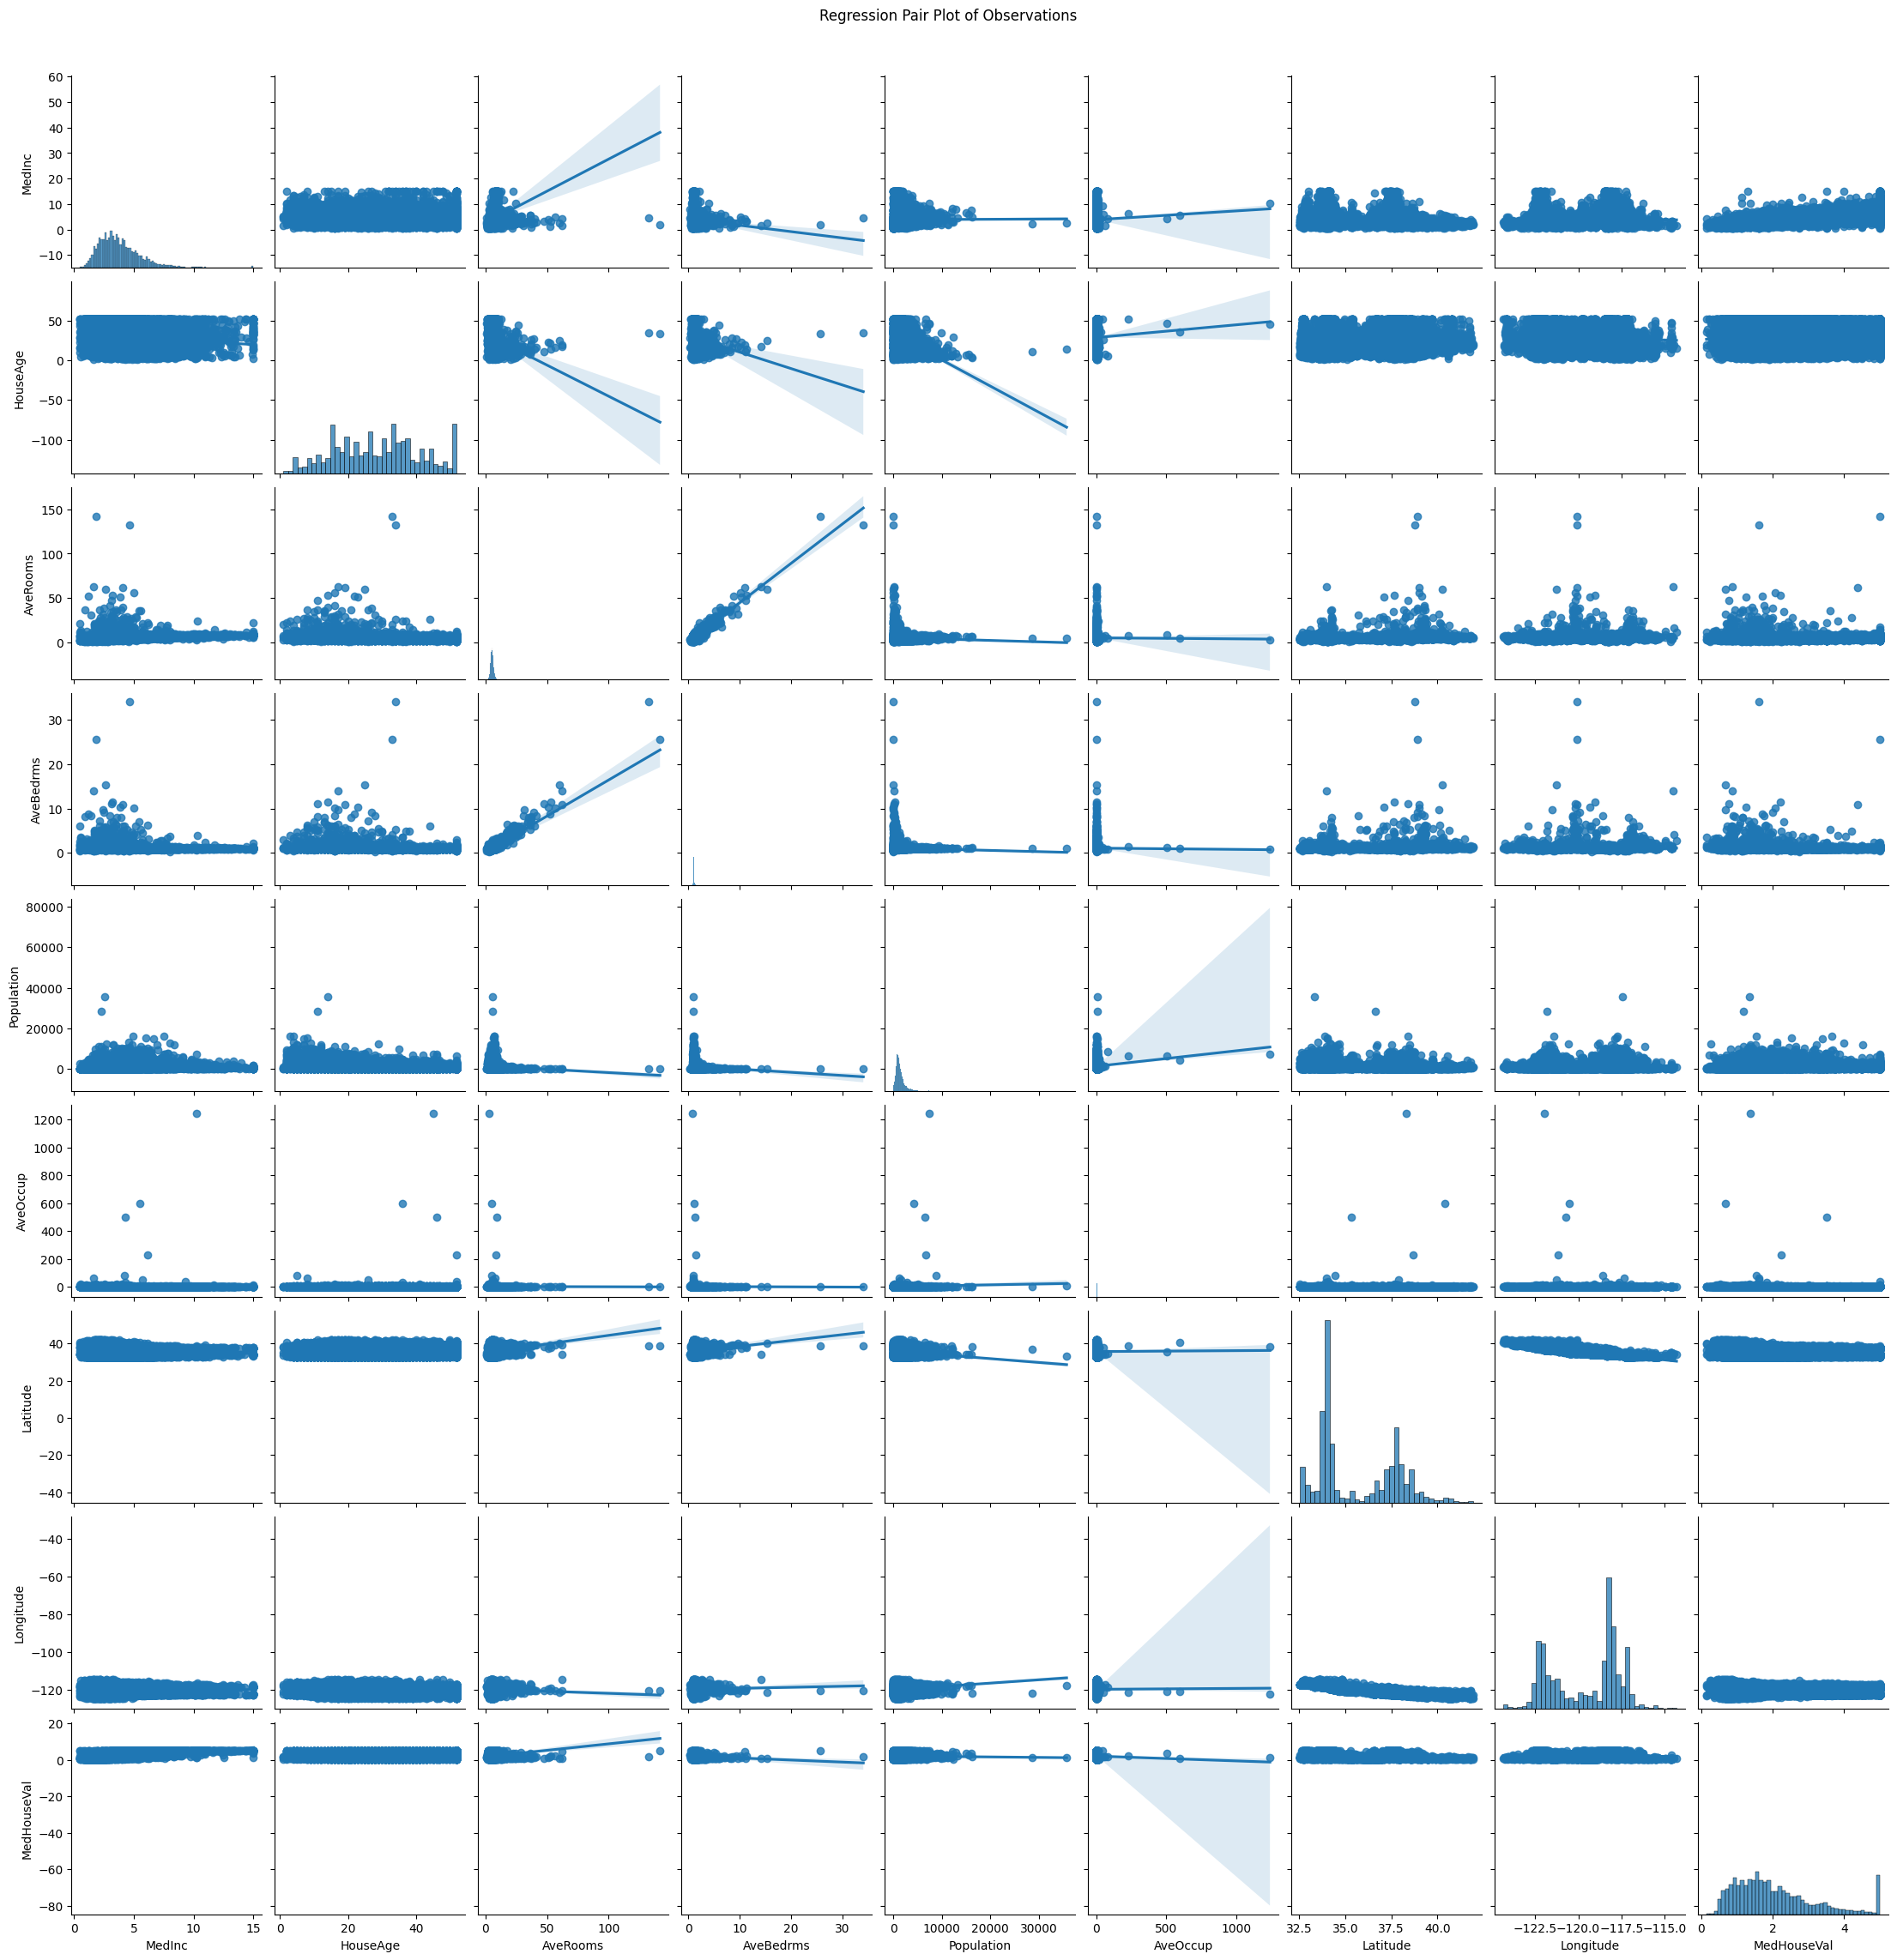

In [ ]:
# Importing libraries
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sea
import pandas as pd
import numpy as np

# Loading dataset
housing = fetch_california_housing()
print("Dimension of Housing California Dataset:", housing.data.shape)
print("Dimension of Target Dataset:", housing.target.shape)

# Column names
columns = housing.feature_names
print("The name of the columns are:\n", columns)

# Create DataFrame
housingdf = pd.DataFrame(housing.data, columns=columns)
housingdf['MedHouseVal'] = housing.target
print(housingdf.head())

# Descriptive statistics for 'MedInc' (Median Income)
print("Details of 'MedInc':\n", housingdf['MedInc'].describe())

# Value counts for 'HouseAge' (to understand its distribution)
print("Value counts for 'HouseAge':\n", housingdf['HouseAge'].value_counts().sort_index())

# Value counts for 'AveRooms' (average rooms per household)
print("Value counts for 'AveRooms':\n", housingdf['AveRooms'].value_counts().sort_index())

# Count plots (HouseAge might be too granular for a count plot; consider binning)
print("-----------------------COUNT PLOTS-------------------")
plt.figure(figsize=(10, 5))
sea.countplot(x=pd.cut(housingdf['HouseAge'], bins=10), data=housingdf)
plt.title('Count of Observations by HouseAge bins')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sea.countplot(x=pd.cut(housingdf['AveRooms'], bins=10), data=housingdf)
plt.title('Count of Observations by AveRooms bins')
plt.xticks(rotation=45)
plt.show()

# Box plot of HouseAge
print("-----------------------BOX PLOT--------------------")
plt.figure(figsize=(8, 6))
sea.boxplot(x='HouseAge', data=housingdf)
plt.title("Boxplot of HouseAge")
plt.show()

# Distribution plots of variables
print("-----------------------DISTRIBUTION PLOTS---------------------")
plt.figure(figsize=(15,15))

variables = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude", "MedHouseVal"]
for i, var in enumerate(variables, 1):
    plt.subplot(4, 3, i)
    sea.histplot(housingdf[var], kde=True)
    plt.title(f"Distribution of {var}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Distribution Plots of Variables", fontsize=16)
plt.show()

# Correlation heatmap
print("------------------------------HEATMAP--------------------------------------")
plt.figure(figsize=(10, 8))
sea.heatmap(housingdf.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Scatter plot: HouseAge vs MedHouseVal
print("------------------------------SCATTER PLOT------------------------------------")
plt.figure(figsize=(8, 6))
sea.scatterplot(x='HouseAge', y='MedHouseVal', data=housingdf)
plt.title("Scatter Plot of HouseAge vs MedHouseVal")
plt.xlabel('HouseAge')
plt.ylabel('MedHouseVal')
plt.show()

# Pair plot with KDE on diagonal
print("------------------------------PAIR PLOT--------------------------------")
sea.pairplot(housingdf, kind='scatter', diag_kind='kde')
plt.suptitle("Scatter Pairplot of Observations", y=1.02)
plt.show()

# Regression pair plot with histogram on diagonal
print("------------------------------REGRESSION PAIR PLOT--------------------------------")
sea.pairplot(housingdf, kind='reg', diag_kind='hist')
plt.suptitle("Regression Pair Plot of Observations", y=1.02)
plt.show()


In [ ]:
# Checking for Missing Values
print("Missing Values in the dataset:\n", housingdf.isnull().sum())

# Dropping missing values if any (though California Housing data typically has none)
housingdf = housingdf.dropna()

# Assumption Check: Normality of Data

from scipy import stats

# Skewness and Kurtosis for each column
print("Skewness of data:\n", housingdf.skew())
print("Kurtosis of data:\n", housingdf.kurtosis())

# Applying Normality Tests column-wise (normaltest and Shapiro)
print("\nNormality Test Results (D’Agostino’s K-squared):")
for col in housingdf.columns:
    stat, p = stats.normaltest(housingdf[col])
    print(f"{col}: stat={stat:.4f}, p-value={p:.4f}")

print("\nShapiro-Wilk Test Results:")
for col in housingdf.columns:
    stat, p = stats.shapiro(housingdf[col])
    print(f"{col}: stat={stat:.4f}, p-value={p:.4f}")

# Outlier Detection using Z-score
import numpy as np

zscore = np.abs(stats.zscore(housingdf))
print("Z-score calculated for all features.")

# Identify indices of rows with any feature having z-score > 3 (potential outliers)
outlier_indices = np.where(zscore > 3)[0]
print("Indexes of potential outliers:\n", outlier_indices)
print("Number of potential outliers:", len(outlier_indices))

# Removing outliers - keep rows where all z-scores < 3
housingdf_clean = housingdf[(zscore < 3).all(axis=1)]
print("Dimension of dataset after removing outliers:", housingdf_clean.shape)

# Also remove corresponding rows from the target array
# Since housing.target is a numpy array, filter it accordingly
housing_target_clean = housing.target[(zscore < 3).all(axis=1)]

# Optional: Update housingdf and housing.target to cleaned versions for further use
housingdf = housingdf_clean.reset_index(drop=True)
housing.target = housing_target_clean

print("Updated target shape after outlier removal:", housing.target.shape)


Missing Values in the dataset:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
Skewness of data:
 MedInc          1.646657
HouseAge        0.060331
AveRooms       20.697869
AveBedrms      31.316956
Population      4.935858
AveOccup       97.639561
Latitude        0.465953
Longitude      -0.297801
MedHouseVal     0.977763
dtype: float64
Kurtosis of data:
 MedInc             4.952524
HouseAge          -0.800629
AveRooms         879.353264
AveBedrms       1636.711972
Population        73.553116
AveOccup       10651.010636
Latitude          -1.117760
Longitude         -1.330152
MedHouseVal        0.327870
dtype: float64

Normality Test Results (D’Agostino’s K-squared):
MedInc: stat=7083.2038, p-value=0.0000
HouseAge: stat=1770.1272, p-value=0.0000
AveRooms: stat=46229.2122, p-value=0.0000
AveBedrms: stat=54620.3280, p-value=0.0000
Population: stat=21882.8085, p-value=0.000

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Multi-collinearity Assumption: Use of VIF (Variance Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vifresult(data, threshold=4.0):
    """
    Iteratively removes features with VIF > threshold.

    Parameters:
        data (pd.DataFrame): Features dataframe (without target).
        threshold (float): VIF threshold to remove features.

    Returns:
        pd.DataFrame: DataFrame with multicollinear columns removed.
    """
    variables = list(range(data.shape[1]))
    dropped = True

    while dropped:
        dropped = False
        vif_values = [variance_inflation_factor(data.iloc[:, variables].values, ix) for ix in range(len(variables))]
        max_vif = max(vif_values)
        max_loc = vif_values.index(max_vif)

        if max_vif > threshold:
            col_to_drop = data.columns[variables[max_loc]]
            print(f"Removing '{col_to_drop}' at VIF = {max_vif:.2f}")
            del variables[max_loc]
            dropped = True

    print("Remaining features after VIF filtering:", data.columns[variables].tolist())
    return data.iloc[:, variables]

# Apply VIF on feature columns (exclude target column)
features = housingdf.drop(columns=['MedHouseVal'])
features_vif_filtered = vifresult(features)

print("Dimension after removing multicollinear features:", features_vif_filtered.shape)

# Optionally, update housingdf to keep only filtered features plus target
housingdf_filtered = pd.concat([features_vif_filtered, housingdf['MedHouseVal']], axis=1)

# Linearity Assumption: Use of Correlation Coefficients

from scipy import stats

target = housingdf_filtered['MedHouseVal']

print("\nLinearity Check: Correlation coefficients between features and target (MedHouseVal):\n")

# Compute and print Pearson, Spearman, and Kendall correlation for each feature with the target
for col in features_vif_filtered.columns:
    pearson_corr, p_pearson = stats.pearsonr(housingdf_filtered[col], target)
    spearman_corr, p_spearman = stats.spearmanr(housingdf_filtered[col], target)
    kendall_corr, p_kendall = stats.kendalltau(housingdf_filtered[col], target)

    print(f"{col}:")
    print(f"  Pearson r = {pearson_corr:.3f} (p = {p_pearson:.3e})")
    print(f"  Spearman rho = {spearman_corr:.3f} (p = {p_spearman:.3e})")
    print(f"  Kendall tau = {kendall_corr:.3f} (p = {p_kendall:.3e})\n")


Removing 'Longitude' at VIF = 861.35
Removing 'Latitude' at VIF = 82.34
Removing 'AveRooms' at VIF = 49.06
Removing 'AveBedrms' at VIF = 16.75
Removing 'AveOccup' at VIF = 8.42
Removing 'MedInc' at VIF = 4.02
Remaining features after VIF filtering: ['HouseAge', 'Population']
Dimension after removing multicollinear features: (19794, 2)

Linearity Check: Correlation coefficients between features and target (MedHouseVal):

HouseAge:
  Pearson r = 0.112 (p = 2.721e-56)
  Spearman rho = 0.078 (p = 2.756e-28)
  Kendall tau = 0.052 (p = 2.005e-27)

Population:
  Pearson r = -0.024 (p = 7.590e-04)
  Spearman rho = 0.010 (p = 1.775e-01)
  Kendall tau = 0.006 (p = 2.003e-01)



In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housingdf_scaled = scaler.fit_transform(housingdf_filtered)
housingdf_scaled = pd.DataFrame(housingdf_scaled, columns=housingdf_filtered.columns)
print("Standard Scaling is done on dataset.")

Standard Scaling is done on dataset.


Dimension of training, test dataset: (13855, 2) (5939, 2)
Coefficient of independent variables:
 [0.11725428 0.006326  ]
Intercept of the model is:  0.0024511208542618234
Durbin-Watson Test Results:
 2.0090783030669033


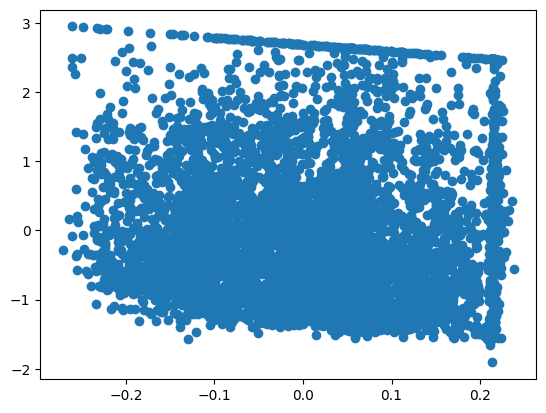

Accuracy of training dataset is:  0.013354980431659835
RMSE value for linear model is: 0.9952184573786403


In [ ]:
#Developing the Model.
#Using a random seed function for generating the same dataset.
numpy.random.seed(3000)

#Creating training, test dataset for dependent and independent variables.
x_trg, x_test, y_trg, y_test = train_test_split(housingdf_scaled.drop('MedHouseVal', axis=1), housingdf_scaled['MedHouseVal'], test_size=0.3, random_state = 0)
print("Dimension of training, test dataset:", x_trg.shape, x_test.shape)

#Creating a linear regression model on training dataset.
model2 = linear_model.LinearRegression()

#Train the model using the training sets.
model2.fit(x_trg, y_trg)

#Equation coefficient and intercept of the new model.
print('Coefficient of independent variables:\n', model2.coef_)
print('Intercept of the model is: ', model2.intercept_)

#Predicting the model
#Make prediction on test set.
pred = model2.predict(x_test)

#independence of error assumption: Using Durbin-Watson test.
resid=y_test-pred
from statsmodels.stats.stattools import durbin_watson
print("Durbin-Watson Test Results:\n", durbin_watson(resid))

#Homoscedasticity Assumption: plot between residuals, predicted values.
plt.scatter(pred,resid)
plt.show()

#Determining accuracy of the mosel.
print("Accuracy of training dataset is: ", model2.score(x_trg, y_trg))
#Calculate RMSE for the model.
rmse = sqrt(mean_squared_error(y_test, pred))
print('RMSE value for linear model is:', rmse)

**Nonlinear Least Square Regression**

Optimized parameters: [ 4.03352238e-04 -1.38266930e-02  2.02954433e+00]
RMSE for nonlinear model: 1.0983544533015959


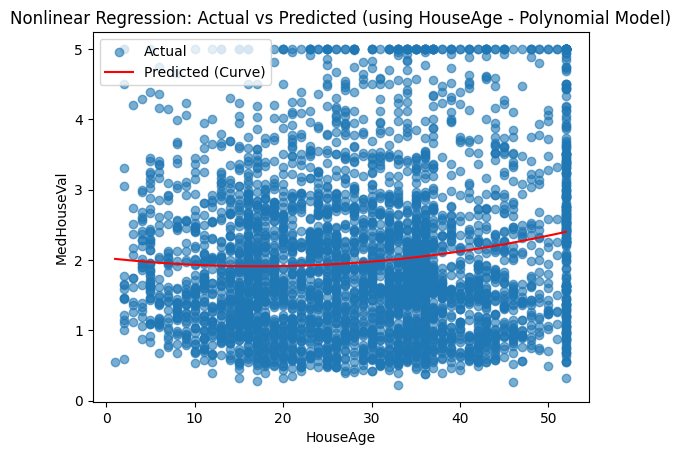

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Use the filtered features for nonlinear regression
# Since we filtered down to 'HouseAge' and 'Population', we need to choose one or use both (which requires a different model function)
# For simplicity in demonstrating curve_fit with a single independent variable, let's use 'HouseAge'
X = housingdf_filtered['HouseAge'].values
y = housingdf_filtered['MedHouseVal'].values

# Split data into train/test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a nonlinear function to fit - trying a simpler polynomial model
# y = a * x**2 + b * x + c
def nonlinear_model(x, a, b, c):
    return a * x**2 + b * x + c

# Initial guess for parameters - adjusted for the simpler model
initial_params = [0.01, 0.1, 1]

# Fit model to training data, increasing maxfev
try:
    params_opt, params_cov = curve_fit(nonlinear_model, x_train, y_train, p0=initial_params, maxfev=5000)

    print("Optimized parameters:", params_opt)

    # Predict on test set
    y_pred = nonlinear_model(x_test, *params_opt)

    # Evaluate model
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE for nonlinear model:", rmse)

    # Plot true vs predicted
    plt.scatter(x_test, y_test, label='Actual', alpha=0.6)
    # Sort x_test for plotting the curve smoothly
    sorted_indices = np.argsort(x_test)
    plt.plot(x_test[sorted_indices], y_pred[sorted_indices], color='red', label='Predicted (Curve)')

    plt.xlabel('HouseAge') # Updated label
    plt.ylabel('MedHouseVal')
    plt.title('Nonlinear Regression: Actual vs Predicted (using HouseAge - Polynomial Model)') # Updated title
    plt.legend()
    plt.show()

except RuntimeError as e:
    print(f"Error during curve fitting: {e}")
    print("Consider trying different initial parameters or a different model function.")

Optimized parameters (a, b, c): [ 4.03352238e-04 -1.38266930e-02  2.02954433e+00]
RMSE for nonlinear polynomial model on test set: 1.0984


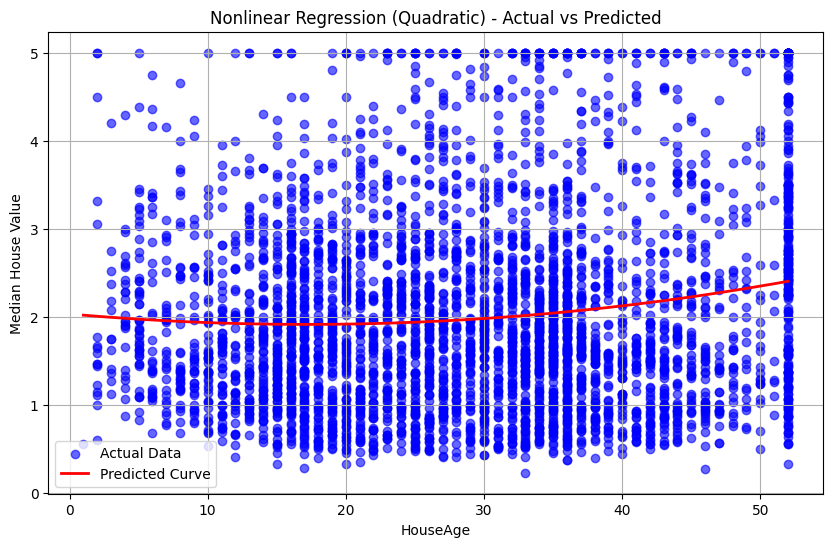

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Using 'HouseAge' as the single predictor variable for nonlinear regression
X = housingdf_filtered['HouseAge'].values
y = housingdf_filtered['MedHouseVal'].values

# Split data into training and testing sets (80-20 split)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a quadratic polynomial nonlinear function:
# y = a * x^2 + b * x + c
def nonlinear_model(x, a, b, c):
    return a * x**2 + b * x + c

# Initial parameter guess - important for convergence
initial_params = [0.01, 0.1, 1]

try:
    # Fit the nonlinear model to training data
    params_opt, params_cov = curve_fit(nonlinear_model, x_train, y_train, p0=initial_params, maxfev=5000)

    print("Optimized parameters (a, b, c):", params_opt)

    # Predict on the test data using optimized parameters
    y_pred = nonlinear_model(x_test, *params_opt)

    # Calculate RMSE on test set as performance metric
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE for nonlinear polynomial model on test set: {rmse:.4f}")

    # Plotting Actual vs Predicted values
    plt.figure(figsize=(10,6))
    plt.scatter(x_test, y_test, label='Actual Data', alpha=0.6, color='blue')

    # For smooth curve, sort x_test and corresponding predictions
    sorted_indices = np.argsort(x_test)
    plt.plot(x_test[sorted_indices], y_pred[sorted_indices], color='red', label='Predicted Curve', linewidth=2)

    plt.xlabel('HouseAge')
    plt.ylabel('Median House Value')
    plt.title('Nonlinear Regression (Quadratic) - Actual vs Predicted')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Additional insights:
    # - The quadratic model captures some nonlinear trend between HouseAge and MedHouseVal.
    # - RMSE indicates the average prediction error in house value units.
    # - Check residual plots to detect patterns or heteroscedasticity (not shown here).
    # - Consider expanding to multivariate nonlinear models for better accuracy.

except RuntimeError as e:
    print(f"Error during curve fitting: {e}")
    print("Try different initial parameters or consider alternative nonlinear models.")
